In [115]:
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa
from skimage import io


image = io.imread(
    "https://github.com/zhixuhao/unet/blob/master/data/membrane/train/image/0.png?raw=true"
)
segmap = io.imread(
    "https://github.com/zhixuhao/unet/blob/master/data/membrane/train/label/0.png?raw=true"
)[..., np.newaxis]

seq = iaa.Sequential(
    [
        iaa.GaussianBlur((0, 3.0)),
        iaa.Affine(translate_px={"x": (-40, 40)}, rotate=(-80, 80), mode="reflect"),
    ]
)
for aug in seq:
    aug._mode_segmentation_maps = "reflect"

In [122]:
images_aug, segmaps_aug = seq(images=[image], segmentation_maps=[segmap])

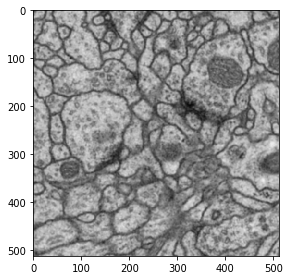

In [123]:
io.imshow(images_aug[0])

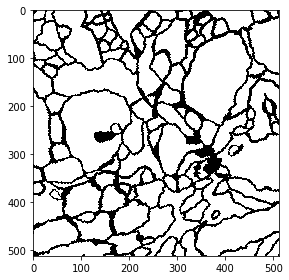

In [124]:
io.imshow(segmaps_aug[0].squeeze(), cmap="gray")